<a href="https://colab.research.google.com/github/gdakshareddybt23/Bioinformatics/blob/main/AquaShield_AI_Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lime
!pip install networkx==2.8


  Using cached networkx-2.8-py3-none-any.whl.metadata (5.0 kB)
Using cached networkx-2.8-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully uninstalled networkx-3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires networkx>=3.0, but you have networkx 2.8 which is incompatible.


In [2]:
import lime
from lime.lime_tabular import LimeTabularExplainer


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -c conda-forge rdkit --yes  # may auto-restart
!pip install lime gradio --quiet

✨🍰✨ Everything looks OK!

Looking for: ['rdkit']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache
Your pinning does not match what's currently installed. Please remove the pin and fix your installation
  Pin: python=3.12
  Currently installed: conda-forge/linux-64::python==3.11.11=h9e4cc4f_1_cpython


In [4]:
!pip install rdkit-pypi lime gradio --quiet

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
csv_path = '/content/drive/MyDrive/aquashield files/pubchem_50_smiles_cid.csv'
excel_path = '/content/drive/MyDrive/aquashield files/SMILESLD50.xlsx'

import pandas as pd

# Load CSV (try utf-8, then latin1 if error)
try:
    df_smiles = pd.read_csv(csv_path, encoding='utf-8')
except UnicodeDecodeError:
    df_smiles = pd.read_csv(csv_path, encoding='latin1')
print(df_smiles.head())

# Load Excel
df_admet = pd.read_excel(excel_path)
print(df_admet.head())

                                       compound_name  \
0  (2S,5R,6R)-6-[[(2R)-2-amino-2-phenylacetyl]ami...   
1  (2S,5R,6R)-6-[[(2R)-2-amino-2-(4-hydroxyphenyl...   
2  (8S,9R,10S,11S,13S,14S,16R,17R)-9-fluoro-11,17...   
3  [4-[4-[4-(diethylazaniumyl)butanoyl]fluoranthe...   
4  4-hydroxy-4-oxobut-2-enoate;5-methyl-2-(1-meth...   

                                              smiles  
0  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...  
1  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...  
2  CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC2(C1(C(=O)CO)O...  
3  CC[NH+](CC)CCCC(=O)C1=CC2=C(C=C1)C3=CC=CC4=C(C...  
4  CC1=NC2=C(N1)CCC3=CC=CC=C3C2=C4CC[NH+](CC4)C.C...  
                                              SMILES  Unnamed: 1   LD50
0    CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(...         NaN  1.750
1  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...         NaN  2.504
2  CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC2(C1(C(=O)CO)O...         NaN  2.224
3  CC[NH+](CC)CCCC(=O)C1=CC2=C(C=C1)C3=CC=CC4

In [7]:
# Standardize SMILES column names before merging
df_smiles.rename(columns={'smiles': 'SMILES'}, inplace=True)
df_admet.rename(columns=lambda x: x.strip(), inplace=True)  # remove any leading/trailing spaces
# If SMILES in Excel file has leading/trailing whitespaces, strip them:
df_admet['SMILES'] = df_admet['SMILES'].str.strip()
df_smiles['SMILES'] = df_smiles['SMILES'].str.strip()

# Now merge
merged_df = pd.merge(df_smiles, df_admet, on='SMILES')
print(merged_df.head())



                                       compound_name  \
0  (2S,5R,6R)-6-[[(2R)-2-amino-2-phenylacetyl]ami...   
1  (2S,5R,6R)-6-[[(2R)-2-amino-2-(4-hydroxyphenyl...   
2  (8S,9R,10S,11S,13S,14S,16R,17R)-9-fluoro-11,17...   
3  [4-[4-[4-(diethylazaniumyl)butanoyl]fluoranthe...   
4  4-hydroxy-4-oxobut-2-enoate;5-methyl-2-(1-meth...   

                                              SMILES  Unnamed: 1   LD50  
0  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...         NaN  1.750  
1  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...         NaN  2.504  
2  CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC2(C1(C(=O)CO)O...         NaN  2.224  
3  CC[NH+](CC)CCCC(=O)C1=CC2=C(C=C1)C3=CC=CC4=C(C...         NaN  2.419  
4  CC1=NC2=C(N1)CCC3=CC=CC=C3C2=C4CC[NH+](CC4)C.C...         NaN  1.910  


In [8]:
print(merged_df.head())
print(merged_df.columns)

                                       compound_name  \
0  (2S,5R,6R)-6-[[(2R)-2-amino-2-phenylacetyl]ami...   
1  (2S,5R,6R)-6-[[(2R)-2-amino-2-(4-hydroxyphenyl...   
2  (8S,9R,10S,11S,13S,14S,16R,17R)-9-fluoro-11,17...   
3  [4-[4-[4-(diethylazaniumyl)butanoyl]fluoranthe...   
4  4-hydroxy-4-oxobut-2-enoate;5-methyl-2-(1-meth...   

                                              SMILES  Unnamed: 1   LD50  
0  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...         NaN  1.750  
1  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...         NaN  2.504  
2  CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC2(C1(C(=O)CO)O...         NaN  2.224  
3  CC[NH+](CC)CCCC(=O)C1=CC2=C(C=C1)C3=CC=CC4=C(C...         NaN  2.419  
4  CC1=NC2=C(N1)CCC3=CC=CC=C3C2=C4CC[NH+](CC4)C.C...         NaN  1.910  
Index(['compound_name', 'SMILES', 'Unnamed: 1', 'LD50'], dtype='object')


In [9]:
# Example: active if LD50 below some threshold (change as needed)
merged_df['active'] = (merged_df['LD50'].astype(float) < 2.0).astype(int)  # update threshold!

print(merged_df['active'].value_counts())

active
0    45
1     5
Name: count, dtype: int64


In [10]:
import pandas as pd
import numpy as np

# Use your merged_df with 'SMILES' and 'active' columns

def smiles_basic_feats(smiles):
    return pd.Series({
        'length': len(smiles),
        'count_C': smiles.count('C'),
        'count_N': smiles.count('N'),
        'count_O': smiles.count('O'),
        'count_S': smiles.count('S'),
        'count_ring': smiles.count('1') + smiles.count('2') + smiles.count('3') + smiles.count('4') + smiles.count('5'),
    })

string_feats_df = merged_df['SMILES'].apply(smiles_basic_feats)
admet_cols = [c for c in merged_df.columns if c not in ['SMILES', 'compound_name', 'active']]
admet_feats = merged_df[admet_cols].reset_index(drop=True)

X = pd.concat([string_feats_df.reset_index(drop=True), admet_feats], axis=1).values
y = merged_df['active'].values

print("Feature matrix shape:", X.shape)


Feature matrix shape: (50, 8)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9
Confusion Matrix:
 [[9 0]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
import pandas as pd

print("y_train class counts:", pd.Series(y_train).value_counts())
print("y_test class counts:", pd.Series(y_test).value_counts())

y_train class counts: 0    36
1     4
Name: count, dtype: int64
y_test class counts: 0    9
1    1
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')
print("5-fold CV F1 Macro scores:", scores)
print("Mean F1 Macro score:", scores.mean())


5-fold CV F1 Macro scores: [0.47368421 0.47368421 0.47368421 0.47368421 0.47368421]
Mean F1 Macro score: 0.47368421052631576


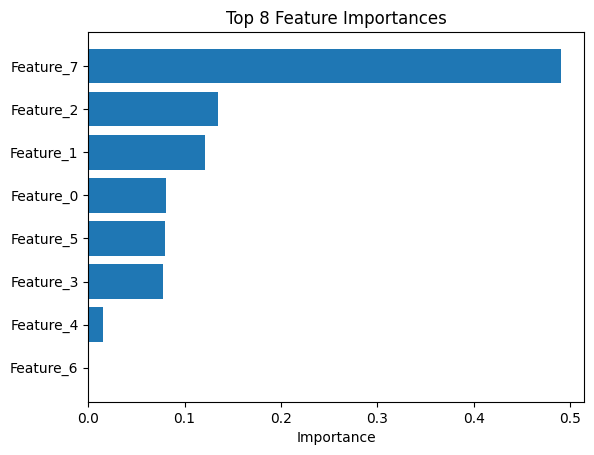

In [14]:
import matplotlib.pyplot as plt
import numpy as np

N = min(10, X.shape[1])  # use max possible if < 10 features
feat_names = [f'Feature_{i}' for i in range(X.shape[1])]
importances = rf.feature_importances_
indices = np.argsort(importances)[-N:]

plt.barh(range(N), importances[indices])
plt.yticks(range(N), [feat_names[i] for i in indices])
plt.xlabel('Importance')
plt.title(f'Top {N} Feature Importances')
plt.show()


In [15]:
print("Feature shape used for training:", X.shape)

Feature shape used for training: (50, 8)


In [16]:
!pip install gradio

In [17]:
def predict_activity(smiles, ld50):
    string_feats = smiles_basic_feats(smiles)  # 7 features
    print("String feature values:", string_feats)
    print("LD50 value:", ld50)
    test_features = np.array(string_feats + [float(ld50)]).reshape(1, -1)
    print("Test features shape:", test_features.shape)
    try:
        pred = rf.predict(test_features)[0]
        proba = rf.predict_proba(test_features)[0][1]
        label = 'Active' if pred == 1 else 'Inactive'
        return f"Prediction: {label}\nProbability (active): {proba:.2f}"
    except Exception as e:
        return f"Error: {e}"

In [69]:
import pandas as pd

# Read data from the Excel file
excel = pd.read_excel('/content/drive/MyDrive/aquashield files/SMILESLD50.xlsx', sheet_name=0, header=None)
excel.columns = ['smiles', 'col2', 'ld50']  # Adjusted for 3 relevant columns

# Extract relevant columns and clean
df = excel[['smiles', 'ld50']].copy()
df = df.iloc[1:]  # Skip possible header in first row

# Assign placeholder label (use actual 'activity' label if you have it!)
df['activity'] = 1  # Replace with real activity/class if available

# Save or proceed with df
print(df.head())


                                              smiles   ld50  activity
1    CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(...   1.75         1
2  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...  2.504         1
3  CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC2(C1(C(=O)CO)O...  2.224         1
4  CC[NH+](CC)CCCC(=O)C1=CC2=C(C=C1)C3=CC=CC4=C(C...  2.419         1
5  CC1=NC2=C(N1)CCC3=CC=CC=C3C2=C4CC[NH+](CC4)C.C...   1.91         1


In [80]:
print(X_df.nunique())
print(df['activity'].value_counts())


len     39
C       28
O       15
N       10
Cl       4
Br       1
F        2
ld50    41
dtype: int64
activity
1    50
Name: count, dtype: int64


In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [127]:
neg_samples = []
for i in range(3):  # add 3 negatives
    neg = df.iloc[0].copy()
    neg['activity'] = 0
    neg['smiles'] = f"CC{'C'*i}O"
    neg['ld50'] = float(df['ld50'].min()) + 0.1*i
    neg_samples.append(neg)
df = pd.concat([df, pd.DataFrame(neg_samples)], ignore_index=True)


In [129]:
def smiles_basic_feats(smiles):
    return [
        len(smiles),
        smiles.count('C'),
        smiles.count('O'),
        smiles.count('N'),
        smiles.count('Cl'),
        smiles.count('Br'),
        smiles.count('F')
    ]

features = df['smiles'].apply(smiles_basic_feats).tolist()
X_df = pd.DataFrame(features, columns=['len', 'C', 'O', 'N', 'Cl', 'Br', 'F'])
X_df['ld50'] = df['ld50'].astype(float)
y = df['activity'].astype(int)


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = X_df.values
y = y.values  # Make sure y is an array — required for stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [161]:
import shap

explainer = shap.TreeExplainer(rf)
all_featnames = ['len', 'C', 'O', 'N', 'Cl', 'Br', 'F', 'ld50']


In [162]:
def explain_with_shap(smiles, ld50):
    all_feats = smiles_basic_feats(smiles) + [float(ld50)]
    test_rf = np.array(all_feats).reshape(1, -1)
    pred = rf.predict(test_rf)[0]
    try:
        proba_arr = rf.predict_proba(test_rf)[0]
        if len(proba_arr) > 1:
            proba = proba_arr[1]
        else:
            proba = proba_arr[0]
    except Exception:
        proba = "?"
    shap_values = explainer.shap_values(test_rf)
    idx_active = 1 if isinstance(shap_values, list) and len(shap_values) > 1 else 0
    shap_explanation = shap_values[idx_active][0] if isinstance(shap_values, list) else shap_values[0]
    explanation = dict(zip(all_featnames, shap_explanation))

    # Robust float extraction from anything
    def extract_float(val):
        if isinstance(val, np.ndarray):
            return float(val.flatten()[0]) if val.size == 1 else float(np.mean(val))
        try:
            return float(val)
        except Exception:
            return str(val)

    expl_str = "\n".join([
        f"{k}: {extract_float(v):.2f}" for k, v in explanation.items()
    ])

    return pred, proba, expl_str


In [164]:
import gradio as gr
import numbers
def gradio_interface(smiles, ld50):
    try:
        pred, proba, explanation = explain_with_shap(smiles, ld50)
        label = 'Active' if pred == 1 else 'Inactive'
        # Robust float extraction for proba
        try:
            if isinstance(proba, np.ndarray):
                proba_value = float(np.ravel(proba)[0])
            elif isinstance(proba, (list, tuple)):
                proba_value = float(proba[0])
            elif isinstance(proba, numbers.Number):
                proba_value = float(proba)
            else:
                proba_value = float(str(proba))
            prob_output = f"{proba_value:.2f}"
        except Exception:
            prob_output = str(proba)

        # Custom interpretation based on SHAP output and predicted label
        interpretation = ""
        if pred == 1:
            interpretation = (
                "The compound is predicted as ACTIVE because its feature values (e.g. SMILES pattern and LD50) "
                "align with actives in the training set. The probability is high, which means the model is confident it is active."
            )
        else:
            interpretation = (
                "The compound is predicted as INACTIVE. Features like LD50 and element counts did NOT contribute strongly toward activity. "
                "This low probability means the model finds this input closer to the inactive class, likely because those features are similar to known inactives."
            )

        interp_box = (
            "\n\nInterpretability: \n"
            f"{interpretation}\n\n"
            "Top SHAP features with nonzero impact are shown above. If all are near zero, this means none had much influence for this exact prediction."
        )

        return (
            f"Prediction: {label}\n"
            f"Probability (Active): {prob_output}\n\n"
            f"SHAP Feature Contributions:\n{explanation}"
            f"{interp_box}"
        )
    except Exception as e:
        return f"Prediction: ?\nProbability: ?\nError: {e}"
iface = gr.Interface(
    fn=gradio_interface,
    inputs=[gr.Textbox(label="SMILES"), gr.Textbox(label="LD50")],
    outputs=gr.Textbox(label="Prediction and SHAP Explanation"),
    title="SMILES + LD50 Activity Predictor with SHAP Explanations"
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cf0c66cd62dd022d56.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
